In [9]:
import pandas as pd

In [10]:
version = 'v6'
df = pd.read_pickle(f'./data/tweets_raw/{version}/df.pkl')
print(df['id'].min())
print(df['id'].max())
print(df.shape)

1416416532595412993
1419598392020271105
(11883, 9)


In [ ]:
# Cleaning
filt = df['user_location'].map(len) < 1
df.loc[filt, 'user_location'] = None

In [23]:
f = ['geo', 'place', 'coordinates', 'user_location']
df[f].isnull().groupby(f).size()

geo    place  coordinates  user_location
False  False  False        False              29
                           True                3
True   False  True         False              42
                           True                9
       True   True         False            8475
                           True             3325
dtype: int64

In [25]:
df.loc[~df['place'].isnull()]

,id,created_at,text,truncated,hashtags,geo,place,coordinates,user_location
96,1419382525584158724,2021-07-25 19:42:19+00:00,@DickieClark2 @brianmoore666 @Conspiracies_HQ ...,True,[],None,"Place(id='573ede7f6c450804', url='https://api....",None,UK
152,1419374844588687362,2021-07-25 19:11:48+00:00,"Don't be shy. Score a job like ""Director, Data...",True,[],"{'type': 'Point', 'coordinates': [41.8812538, ...","Place(id='1d9a5370a355ab0c', url='https://api....","{'type': 'Point', 'coordinates': [-87.6391108,...","Chicago, IL"
153,1419374800804274176,2021-07-25 19:11:37+00:00,"Career tip for landing jobs like ""Web Develope...",True,[WinstonSalem],"{'type': 'Point', 'coordinates': [36.0906568, ...","Place(id='24a53a1880093fa9', url='https://api....","{'type': 'Point', 'coordinates': [-80.2715385,...","Triad Area, NC"
234,1419364851923619840,2021-07-25 18:32:05+00:00,I'll be hanging out at the @Microsoft / @Githu...,True,[EuroPython],None,"Place(id='df4875cc2df893ed', url='https://api....",None,"179°56′39.4″, +0°2′46.2″ 8k pc"
306,1419358319727157251,2021-07-25 18:06:08+00:00,Join #TeamCVS as we work together to promote h...,True,[TeamCVS],"{'type': 'Point', 'coordinates': [42.1146501, ...","Place(id='ecbe21c16e88f161', url='https://api....","{'type': 'Point', 'coordinates': [-87.8752333,...","Chicago, IL"
...,...,...,...,...,...,...,...,...,...
387,1419553956867551237,2021-07-26 07:03:32+00:00,This can easily apply to any creative field (i...,False,[],None,"Place(id='01c7ed8caf11e8b2', url='https://api....",None,London
1262,1419415166895132677,2021-07-25 21:52:01+00:00,Our CSAR Director @billfranksga interviews @Al...,True,[],None,"Place(id='7142eb97ae21e839', url='https://api....",None,"Kennesaw, GA"
1263,1419415071424401414,2021-07-25 21:51:39+00:00,Sweet and right in the middle .\n\nI used to t...,True,[],None,"Place(id='84f644e036f3dcb0', url='https://api....",None,127.0.0.1
1274,1419413299947397121,2021-07-25 21:44:36+00:00,Click the link in our bio to see currently ope...,True,[GeneralScience],"{'type': 'Point', 'coordinates': [36.0906568, ...","Place(id='24a53a1880093fa9', url='https://api....","{'type': 'Point', 'coordinates': [-80.2715385,...","Triad Area, NC"


# Time chart

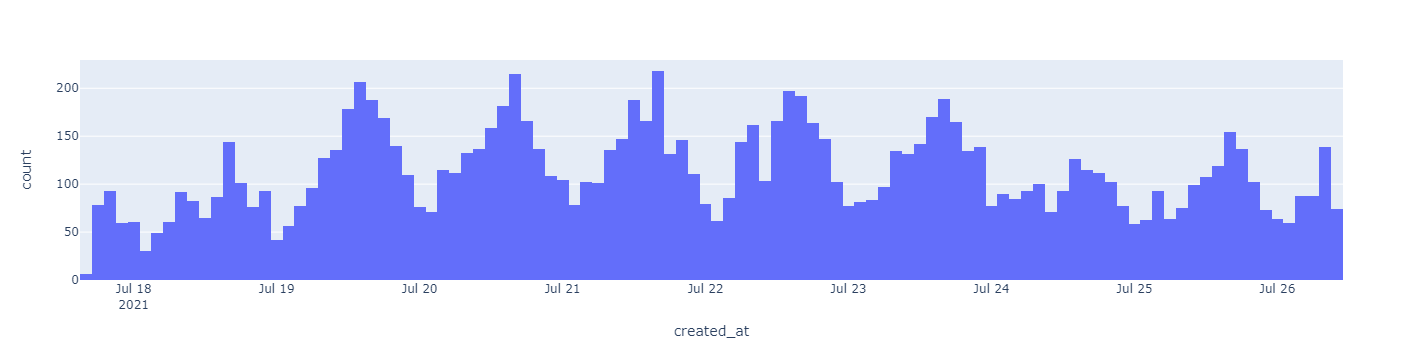

In [11]:
# Just Checking
import plotly.express as px
px.histogram(df, x='created_at', nbins=200)

# Map

In [7]:
df_geo = df.loc[~df['coordinates'].isnull()].copy()
df_geo['Lat'] = df_geo['coordinates'].map(lambda c: c[0])
df_geo['Long']= df_geo['coordinates'].map(lambda c: c[1])

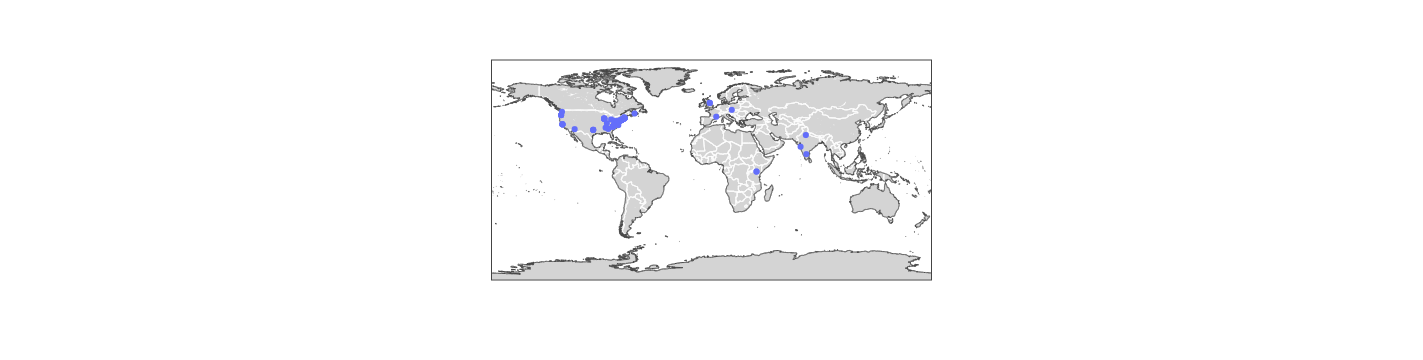

In [8]:
import plotly.express as px
fig = px.scatter_geo(df_geo, lat='Lat', lon='Long', hover_name="text")
fig.update_layout(
    geo = dict(
        showland = True,
        showlakes = True,
        showsubunits = True,
        showcountries = True,
        landcolor = "rgb(212, 212, 212)",
        countrycolor = "rgb(255, 255, 255)",
        lakecolor = "rgb(255, 255, 255)",
        resolution = 50
    )
)
fig.show()